<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

<h1 align=center><font size = 5> Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20180928125713-0000


### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2018-09-28 12:57:17--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: 'loan_train.csv'

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.07s   

2018-09-28 12:57:17 (302 KB/s) - 'loan_train.csv' saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

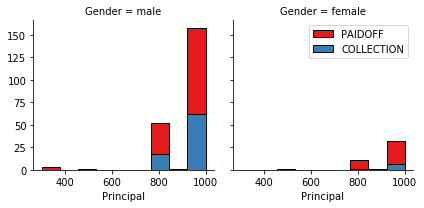

In [8]:
import seaborn as sns

bins=np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

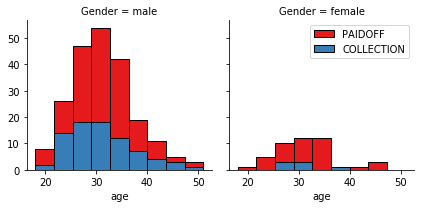

In [9]:
bins=np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

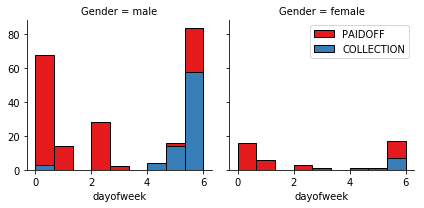

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins=np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend']= df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical variables to binary variables and append them to the feature Data Frame 

In [16]:
Feature=df[['Principal','terms','age','Gender','weekend']]
Feature=pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [18]:
y = df['loan_status'].values
y = np.asarray(df['loan_status'].apply(lambda x: 1 if x == 'PAIDOFF' else 0))
y[0:5]

array([1, 1, 1, 1, 1])

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)

X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You can find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import metrics #svm, datasets
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [22]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhatknn=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhatknn)
    std_acc[n-1]=np.std(yhatknn==y_test)/np.sqrt(yhatknn.shape[0])

print(mean_acc)
knnbest = mean_acc.argmax()+1
print("Best Accuracy is with neighbor ",knnbest)

[ 0.67142857  0.65714286  0.71428571  0.68571429  0.75714286  0.71428571
  0.78571429  0.75714286  0.75714286]
Best Accuracy is with neighbor  7


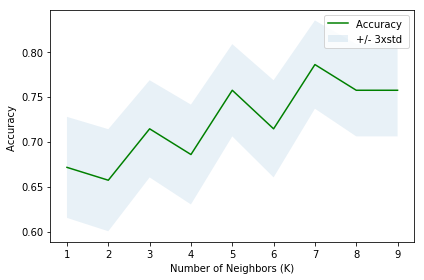

In [23]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

Confusion matrix, without normalization
[[ 6  9]
 [ 6 49]]


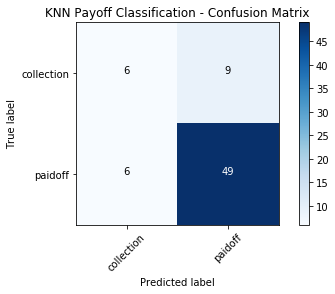

In [24]:
from sklearn.metrics import confusion_matrix
neigh = KNeighborsClassifier(n_neighbors = knnbest).fit(X_train,y_train)
yhat = neigh.predict(X_test)
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)
plt.figure()
plot_conf_matrix(cnf_matrix, classes=['collection', 'paidoff'], title='KNN Payoff Classification - Confusion Matrix')
plt.show()

# Decision Tree

In [25]:
!conda install -c anaconda pydotplus -y

Solving environment: done

## Package Plan ##

  environment location: /opt/ibm/conda/miniconda3

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.5.11               |           py35_0         1.0 MB  anaconda
    pydotplus-2.0.2            |           py35_0          41 KB  anaconda
    openssl-1.0.2p             |       h14c3975_0         3.5 MB  anaconda
    certifi-2018.8.24          |           py35_1         139 KB  anaconda
    ca-certificates-2018.03.07 |                0         124 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.8 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-py35_0          anaconda

The following packages will be UPDATED:

    ca-certificates: 2017.08.26-h1d4fec5_0          --> 2018.03.07-

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
Dt_Ns = 10
offset=4

mean_acc = np.zeros((Dt_Ns))
std_dt = np.zeros((Dt_Ns))
Dt_r = range(offset, Dt_Ns)
for n_depth in Dt_r:
    loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = n_depth).fit(X_train, y_train)
    yhatTree = loanTree.predict(X_test)
    mean_acc[n_depth-offset-1] = metrics.accuracy_score(y_test, yhatTree)
    std_dt[n_depth-offset-1] = np.std(yhatTree==y_test)/np.sqrt(yhatTree.shape[0])
print(mean_acc)
dtbest = mean_acc.argmax()+offset+1
print( "The best accuracy was with", mean_acc.max(), ", depth =", dtbest)

[ 0.64  0.77  0.76  0.76  0.66  0.    0.    0.    0.    0.61]
The best accuracy was with 0.771428571429 , depth = 6


In [28]:
besttree = DecisionTreeClassifier(criterion="entropy", max_depth = dtbest)
besttree.fit(X_train,y_train)
yhattree = besttree.predict(X_test)
bestmeanacc = metrics.accuracy_score(y_test, yhattree)
print(bestmeanacc)

0.771428571429


In [29]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

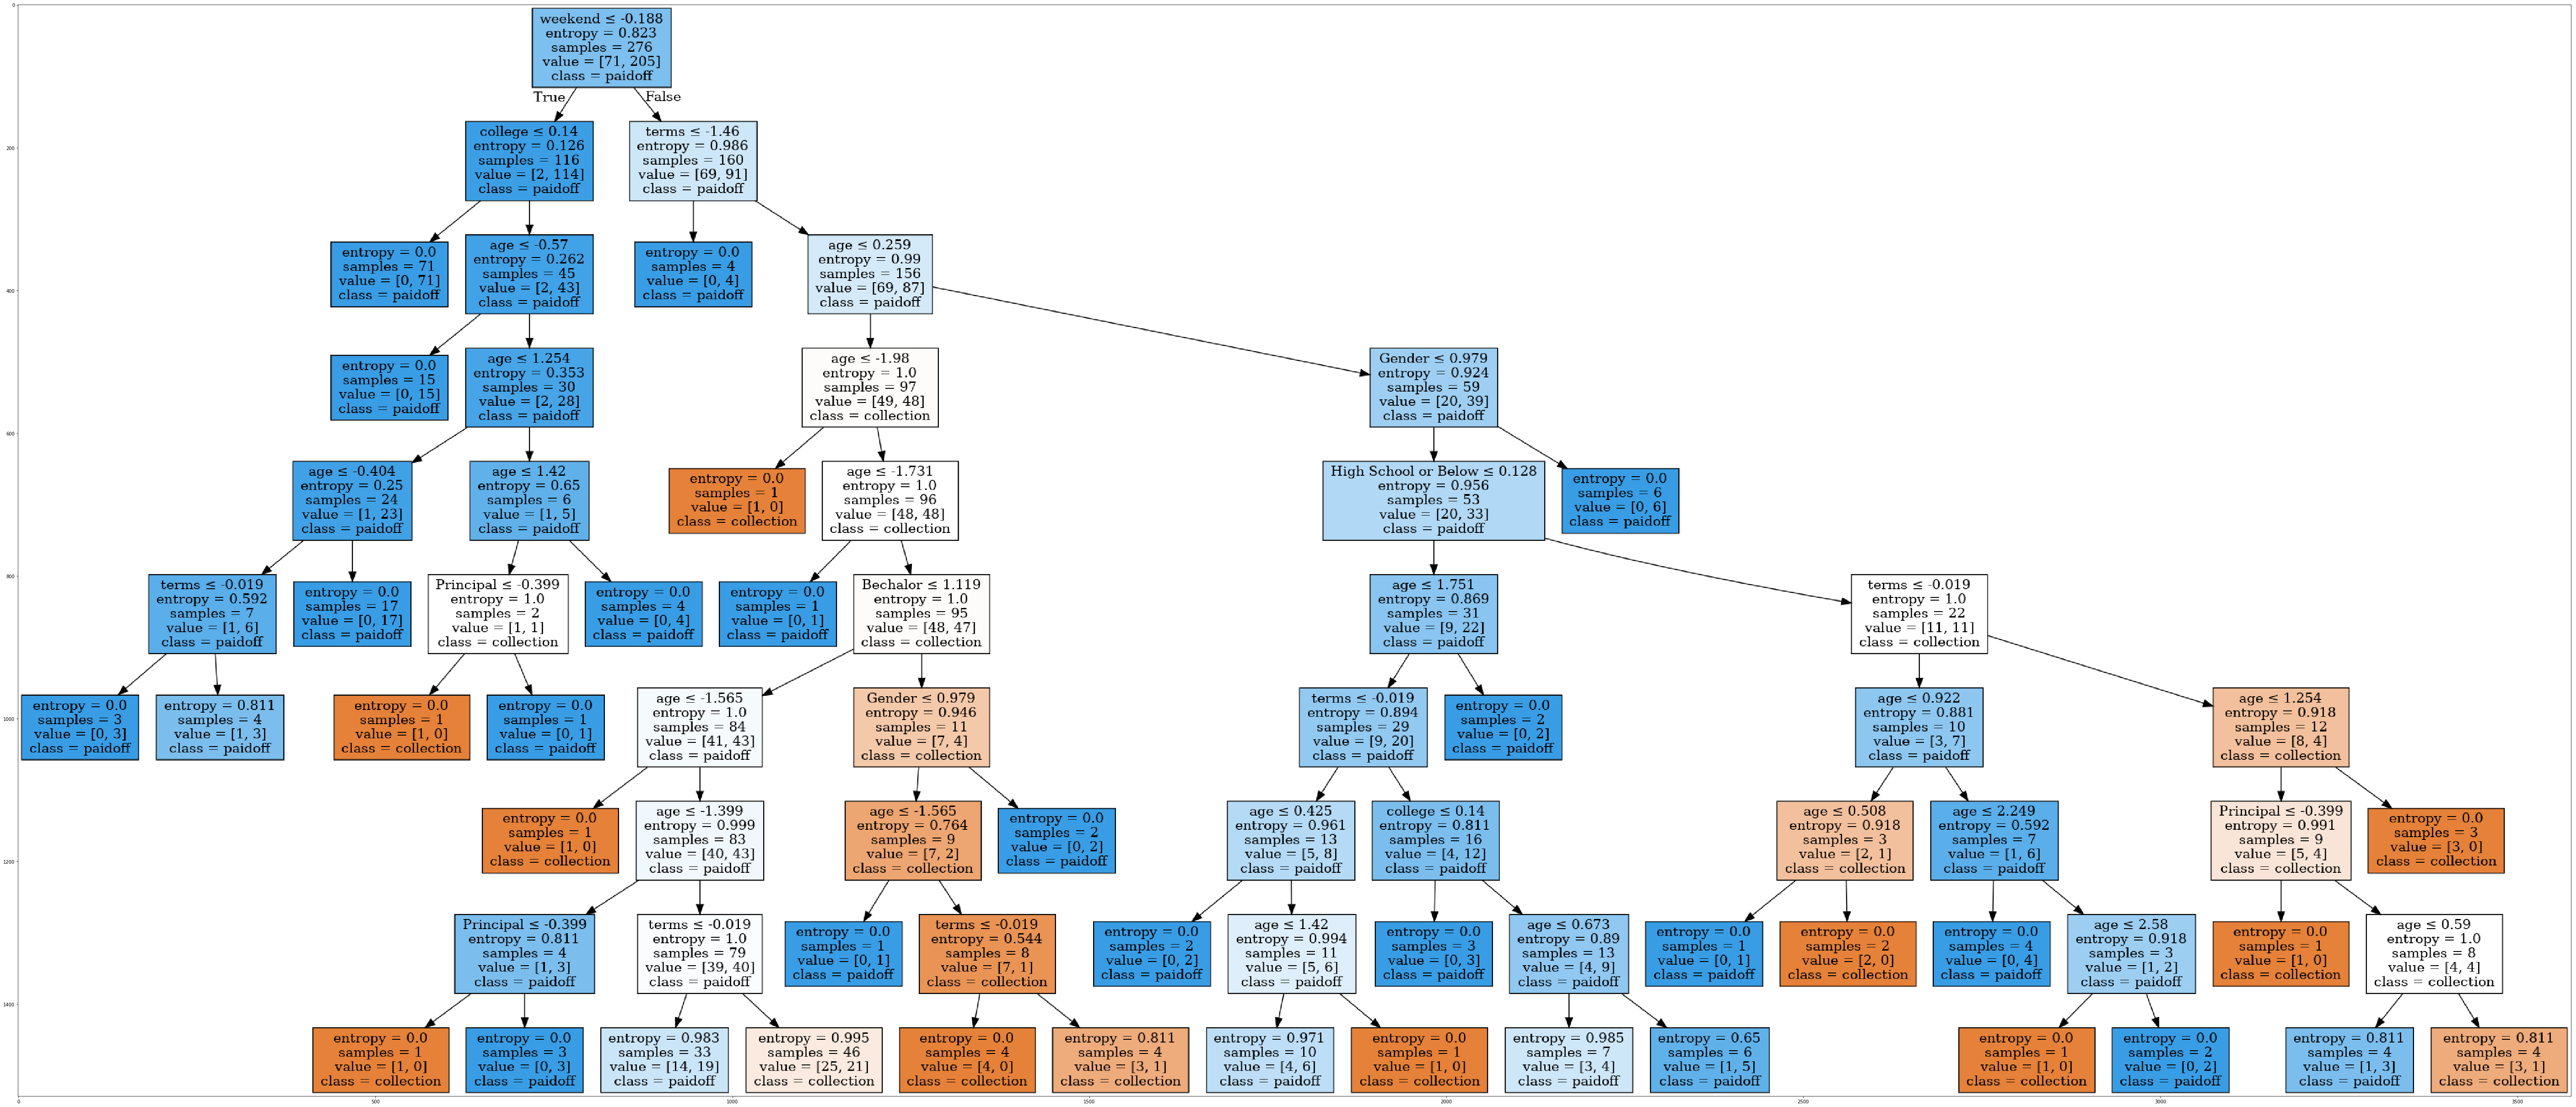

In [30]:
dot_data = StringIO()
filename = "loantree.png"
featureNames = Feature.columns
targetNames = df['loan_status'].unique().tolist()
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(['collection', 'paidoff']), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

Confusion matrix, without normalization
[[ 1 14]
 [ 2 53]]


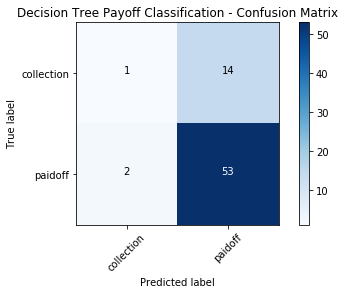

In [31]:
cnf_matrix = confusion_matrix(y_test, yhattree)
np.set_printoptions(precision=2)
plt.figure()
plot_conf_matrix(cnf_matrix, classes=['collection', 'paidoff'], title='Decision Tree Payoff Classification - Confusion Matrix')
plt.show()

# Support Vector Machine

In [32]:
from sklearn import svm
knls = ['linear', 'rbf', 'sigmoid']
mean_acc = np.zeros((len(knls)))
for kernel in knls:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[knls.index(kernel)] = metrics.accuracy_score(y_test, yhat)
svmkernelbest = knls[mean_acc.argmax()+1]
print( "The best accuracy was with", mean_acc.max(), ", kernel =", svmkernelbest)

The best accuracy was with 0.785714285714 , kernel = rbf


In [33]:
C_range = np.arange(0.1, 2.0, 0.01)
mean_acc = np.zeros(len(C_range))
std_svm = np.zeros(len(C_range))
for n, c in enumerate(C_range):
    clf = svm.SVC(C=c, kernel=svmkernelbest)
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[n] = metrics.accuracy_score(y_test, yhat)
    std_svm[n] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
svmcbest = C_range[mean_acc.argmax()+1]
print( "The best accuracy was with", mean_acc.max(), ", kernel =", svmkernelbest, ", c = ", svmcbest)

The best accuracy was with 0.785714285714 , kernel = rbf , c =  0.11


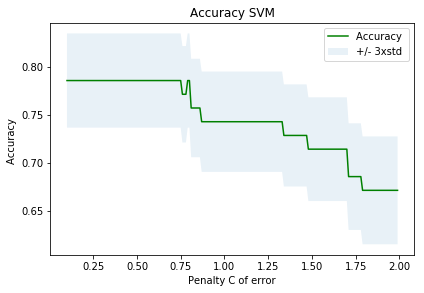

In [34]:
plt.plot(C_range, mean_acc,'g')
plt.fill_between(C_range, mean_acc - 1 * std_svm, mean_acc + 1 * std_svm, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Penalty C of error')
plt.tight_layout()
plt.title("Accuracy SVM")
plt.show()

Best accuracy:  0.785714285714
Confusion matrix, without normalization
[[ 0 15]
 [ 0 55]]


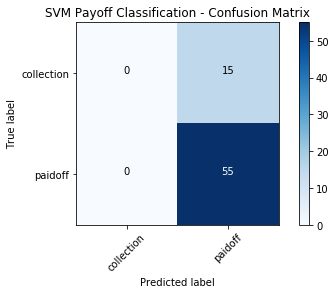

In [35]:
bestsvm = svm.SVC(C=svmcbest, kernel=svmkernelbest)
bestsvm.fit(X_train, y_train)
yhat = bestsvm.predict(X_test)
print("Best accuracy: ", metrics.accuracy_score(y_test, yhat))
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)
plt.figure()
plot_conf_matrix(cnf_matrix, classes=['collection', 'paidoff'], title='SVM Payoff Classification - Confusion Matrix')
plt.show()

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
C_range = np.linspace(.01, 1., 10, dtype=float)/10
mean_acc = np.zeros(len(C_range))
std_lr = np.zeros(len(C_range))
print(C_range)
for n, c in enumerate(C_range):
    LR = LogisticRegression(C=c, solver='liblinear').fit(X_train,y_train)
    yhat = LR.predict(X_test)
    mean_acc[n] = metrics.accuracy_score(y_test, yhat)
    std_lr[n] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
lrcbest = mean_acc.argmax()
print( "The best accuracy was with", mean_acc.max(), ", c =", C_range[lrcbest])

[ 0.    0.01  0.02  0.03  0.04  0.06  0.07  0.08  0.09  0.1 ]
The best accuracy was with 0.742857142857 , c = 0.045


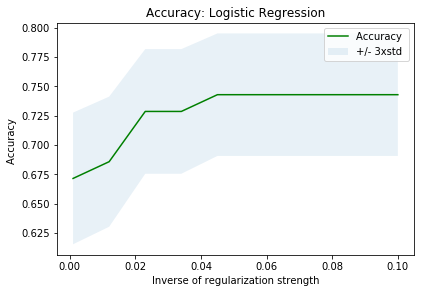

In [38]:
plt.plot(C_range, mean_acc,'g')
plt.fill_between(C_range, mean_acc - 1 * std_lr, mean_acc + 1 * std_lr, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Inverse of regularization strength')
plt.tight_layout()
plt.title("Accuracy: Logistic Regression")
plt.show()

In [39]:
lrbest = LogisticRegression(C=C_range[lrcbest], solver='liblinear').fit(X_train,y_train)
yhat = lrbest.predict(X_test)
yhat_prob = lrbest.predict_proba(X_test)
mean_acc = metrics.accuracy_score(y_test, yhat)
print("Best accuracy ", mean_acc)
lrjss = jaccard_similarity_score(y_test, yhat)
print("Jaccard", lrjss)
lrll = log_loss(y_test, yhat_prob)
print("LogLoss", lrll)
lrf1s = f1_score(y_test, yhat)
print("F1-Score", lrf1s)

Best accuracy  0.742857142857
Jaccard 0.742857142857
LogLoss 0.512988109792
F1-Score 0.847457627119


In [40]:
yhat

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1])

Confusion matrix, without normalization
[[ 2 13]
 [ 5 50]]


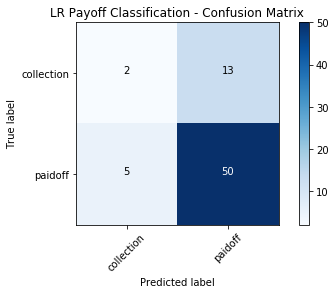

In [41]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)
plt.figure()
plot_conf_matrix(cnf_matrix, classes=['collection', 'paidoff'], title='LR Payoff Classification - Confusion Matrix')
plt.show()

# Model Evaluation using Test set

First, download and load the test set:

In [42]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2018-09-28 12:59:07--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: 'loan_test.csv'

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2018-09-28 12:59:08 (453 MB/s) - 'loan_test.csv' saved [3642/3642]



### Load Test set for evaluation 

In [43]:
dfTest = pd.read_csv('loan_test.csv')
dfTest.dropna(axis=1)
dfTest.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [44]:
#rename columns for case uniformity
dfTest.rename(columns={'Principal':'principal', 'Gender':'gender'}, inplace=True)
#convert relevant columns to correct data type
dfTest['due_date']=pd.to_datetime(dfTest['due_date'])
dfTest['effective_date']=pd.to_datetime(dfTest['effective_date'])
#Calculate weekend
dfTest['weekend']= dfTest['effective_date'].dt.dayofweek.apply(lambda x: 1 if (x>3)  else 0)
#Convert Gender to integer values
dfTest['gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)


In [45]:
#Feature Extraction
#summarize by education and assign X_test
Feature_test=dfTest[['principal','terms','age','gender','weekend']]
Feature_test=pd.concat([Feature_test,pd.get_dummies(dfTest['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test.head()


,principal,terms,age,gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [46]:
#Scale and transform test feature set
X_test=Feature_test
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test[0:5]

array([[ 0.49,  0.93,  3.06,  1.98, -1.3 ,  2.4 , -0.8 , -0.86],
       [-3.56, -1.7 ,  0.53, -0.51,  0.77, -0.42, -0.8 , -0.86],
       [ 0.49,  0.93,  1.88,  1.98,  0.77, -0.42,  1.25, -0.86],
       [ 0.49,  0.93, -0.98, -0.51,  0.77, -0.42, -0.8 ,  1.16],
       [-0.67, -0.79, -0.48, -0.51,  0.77,  2.4 , -0.8 , -0.86]])

In [47]:
#Assign y_test
y_test = dfTest['loan_status'].values
y_test = np.asarray(dfTest['loan_status'].apply(lambda x: 1 if x == 'PAIDOFF' else 0))
y_test[0:5]

array([1, 1, 1, 1, 1])

In [48]:
dfRslt = pd.DataFrame({'Algorithm': ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression'],
                   'Jaccard': [0.0, 0.0, 0.0, 0.0],
                   'F1-score': [0.0, 0.0, 0.0, 0.0],
                   'Logloss': [np.NaN, np.NaN, np.NaN, 0.0]})
dfRslt.set_index('Algorithm',inplace=True)
dfRslt.head()

,F1-score,Jaccard,Logloss
Algorithm,,,
KNN,0.0,0.0,NaN
Decision Tree,0.0,0.0,NaN
SVM,0.0,0.0,NaN
Logistic Regression,0.0,0.0,0.0


In [49]:
# KNN Evaluation
yhatknn=neigh.predict(X_test)
# Assign values to result dataframe
dfRslt.loc['KNN']['F1-score']=f1_score(y_test, yhatknn, average='weighted')
dfRslt.loc['KNN']['Jaccard']=jaccard_similarity_score(y_test, yhatknn)
dfRslt.loc['KNN']['Logloss']="NA"
print(dfRslt.loc['KNN'])

F1-score    0.632840
Jaccard     0.666667
Logloss          NaN
Name: KNN, dtype: float64


In [50]:
# Decision Tree Evaluation
yhatdt= besttree.predict(X_test)
# Assign values to result dataframe
dfRslt.loc['Decision Tree']['F1-score']=f1_score(y_test, yhatdt, average='weighted')
dfRslt.loc['Decision Tree']['Jaccard']=jaccard_similarity_score(y_test, yhatdt)
dfRslt.loc['Decision Tree']['Logloss']="NA"
print(dfRslt.loc['Decision Tree'])

F1-score    0.670478
Jaccard     0.722222
Logloss          NaN
Name: Decision Tree, dtype: float64


In [51]:
# SVM Evaluation
yhatsvm = bestsvm.predict(X_test)
# Assign values to result dataframe
dfRslt.loc['SVM']['F1-score']=f1_score(y_test, yhatsvm, average='weighted')
dfRslt.loc['SVM']['Jaccard']=jaccard_similarity_score(y_test, yhatsvm)
dfRslt.loc['SVM']['Logloss']="NA"
print(dfRslt.loc['SVM'])

F1-score    0.630418
Jaccard     0.740741
Logloss          NaN
Name: SVM, dtype: float64


/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
# Logistic Regression Evaluation
yhatlr = lrbest.predict(X_test)
yhat_problr = lrbest.predict_proba(X_test)
# Assign values to result dataframe
dfRslt.loc['Logistic Regression']['F1-score']=f1_score(y_test, yhatlr, average='weighted')
dfRslt.loc['Logistic Regression']['Jaccard']=jaccard_similarity_score(y_test, yhatlr)
dfRslt.loc['Logistic Regression']['Logloss']=log_loss(y_test, yhat_problr)
print(dfRslt.loc['Logistic Regression'])


F1-score    0.671764
Jaccard     0.759259
Logloss     0.495977
Name: Logistic Regression, dtype: float64


In [53]:
dfRslt.head()

,F1-score,Jaccard,Logloss
Algorithm,,,
KNN,0.632840,0.666667,NaN
Decision Tree,0.670478,0.722222,NaN
SVM,0.630418,0.740741,NaN
Logistic Regression,0.671764,0.759259,0.495977


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at [Watson Studio](https://cocl.us/ML0101EN_DSX)


<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​

### Thanks for completing this lesson!

Notebook created by: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>